<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/dimension_reduce1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import os 

np.random.seed(42) 

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
    
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
np.random.seed(4) 

m = 60 

w1,w2 = 0.1, 0.3 

noise = 0.1 

angles = np.random.rand(m) * 3 *np.pi/2 - 0.5 

x = np.empty((m,3)) 
x[:,0] = np.cos(angles)+np.sin(angles)/2 + noise*np.random.randn(m)/2 
x[:,1] = np.sin(angles)*0.7+noise*np.random.randn(m)/2
x[:,2] = x[:,0]*w1 + x[:,1]*w2+noise*np.random.randn(m)

In [0]:
x_centered = x - x.mean()
U,s,Vt = np.linalg.svd(x_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [0]:
m,n = x.shape 

S = np.zeros(x_centered.shape) 
S[:n,:n] = np.diag(s) 

In [5]:
np.allclose(x_centered,U.dot(S).dot(Vt))

True

In [0]:
W2 = Vt.T[:,:2]
X2D = x_centered.dot(W2) 


In [0]:
X2D_using_svd = X2D

In [0]:
from sklearn.decomposition import PCA 

pca = PCA(n_components =2 ) 
X2D = pca.fit_transform(x) 

In [11]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [12]:
X2D_using_svd[:5]

array([[-1.30555522, -0.3143937 ],
       [ 0.02921145,  0.47787984],
       [-1.21956981, -0.25287901],
       [-0.94278529,  0.41629724],
       [-0.77886461,  0.35537999]])

In [13]:
np.allclose(X2D,-X2D_using_svd)

False

In [0]:
X3D_inv = pca.inverse_transform(X2D)

In [15]:
np.allclose(X3D_inv,x) 

False

In [16]:
np.mean(np.sum(np.square(X3D_inv-x),axis=1))  

0.010170337792848549

In [0]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2,:]) 

In [18]:
np.allclose(X3D_inv_using_svd,X3D_inv-pca.mean_) 

False

In [19]:
pca.components_ 

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [20]:
Vt[:2]

array([[ 0.93894372,  0.2897084 ,  0.18561717],
       [-0.3275518 ,  0.91778545,  0.22445418]])

In [21]:
pca.explained_variance_ratio_ 

array([0.84248607, 0.14631839])

In [22]:
1 - pca.explained_variance_ratio_.sum() 

0.011195535570688975

In [23]:
np.square(s) / np.square(s).sum() 

array([0.82800169, 0.15803284, 0.01396547])

In [0]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d 


class Arrow3D(FancyArrowPatch): 
  def __init__(self,xs,ys,zs,*args,**kwargs):
    FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs) 
    self._verts3d = xs,ys,zs
    
  def draw(self,renderer):
    xs3d,ys3d,zs3d = self._verts3d
    
    xs ,ys,zs = proj3d.proj_transform(xs3d,ys3d,zs3d,renderer.M)
    self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
    FancyArrowPatch.draw(self,renderer) 

In [0]:
axes = [-1.8,1.8,-1.3,1.3,-1.,1.]

x1s = np.linspace(axes[0],axes[1],10) 
x2s = np.linspace(axes[2],axes[3],10) 

x1,x2 = np.meshgrid(x1s,x2s) 

C = pca.components_
R = C.T.dot(C) 
z = (R[0,2]*x1+R[1,2]*x2)/(1-R[2,2]) 

Saving figure dataset_3d_plot


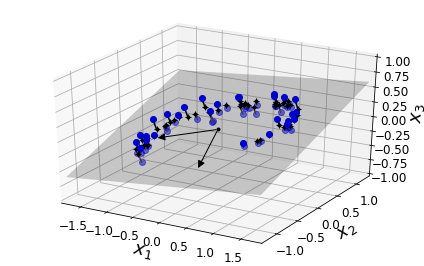

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = x[x[:, 2] > X3D_inv[:, 2]]
X3D_below = x[x[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")
for i in range(m):
    if x[i, 2] > X3D_inv[i, 2]:
        ax.plot([x[i][0], X3D_inv[i][0]], [x[i][1], X3D_inv[i][1]], [x[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([x[i][0], X3D_inv[i][0]], [x[i][1], X3D_inv[i][1]], [x[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
save_fig("dataset_3d_plot")
plt.show()

Saving figure dataset_2d_plot


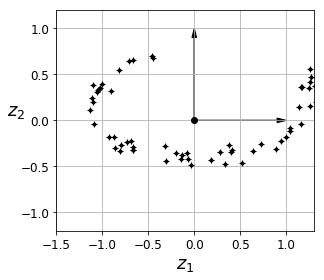

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

In [0]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

Saving figure swiss_roll_plot


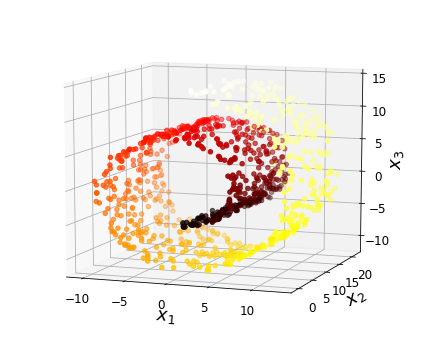

In [33]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()

ValueError: ignored

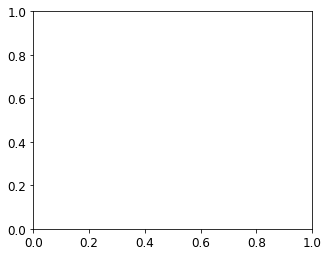

In [35]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(x[:, 0], x[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, x[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

IndexError: ignored

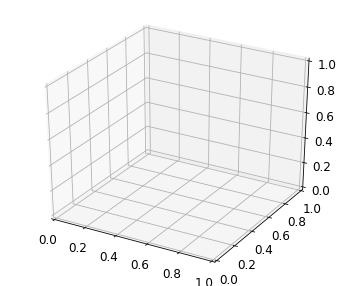

In [36]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = x[positive_class]
X_neg = x[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], x[positive_class, 1], "gs")
plt.plot(t[~positive_class], x[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = x[positive_class]
X_neg = x[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], x[positive_class, 1], "gs")
plt.plot(t[~positive_class], x[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot4")
plt.show()